# Cloud Provider Results Comparison Notebook

In [16]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
#plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.dpi'] = 300

In [17]:
with open('../aws/aws_categories_rates_tfsec.pkl', 'rb') as f:
    aws_categories_rates = pickle.load(f)

with open('../azure/azure_categories_rates_tfsec.pkl', 'rb') as f:
    azure_categories_rates = pickle.load(f)
    
with open('../google/google_categories_rates_tfsec.pkl', 'rb') as f:
    google_categories_rates = pickle.load(f)
google_categories_rates["Hard-coded secret"] = 0

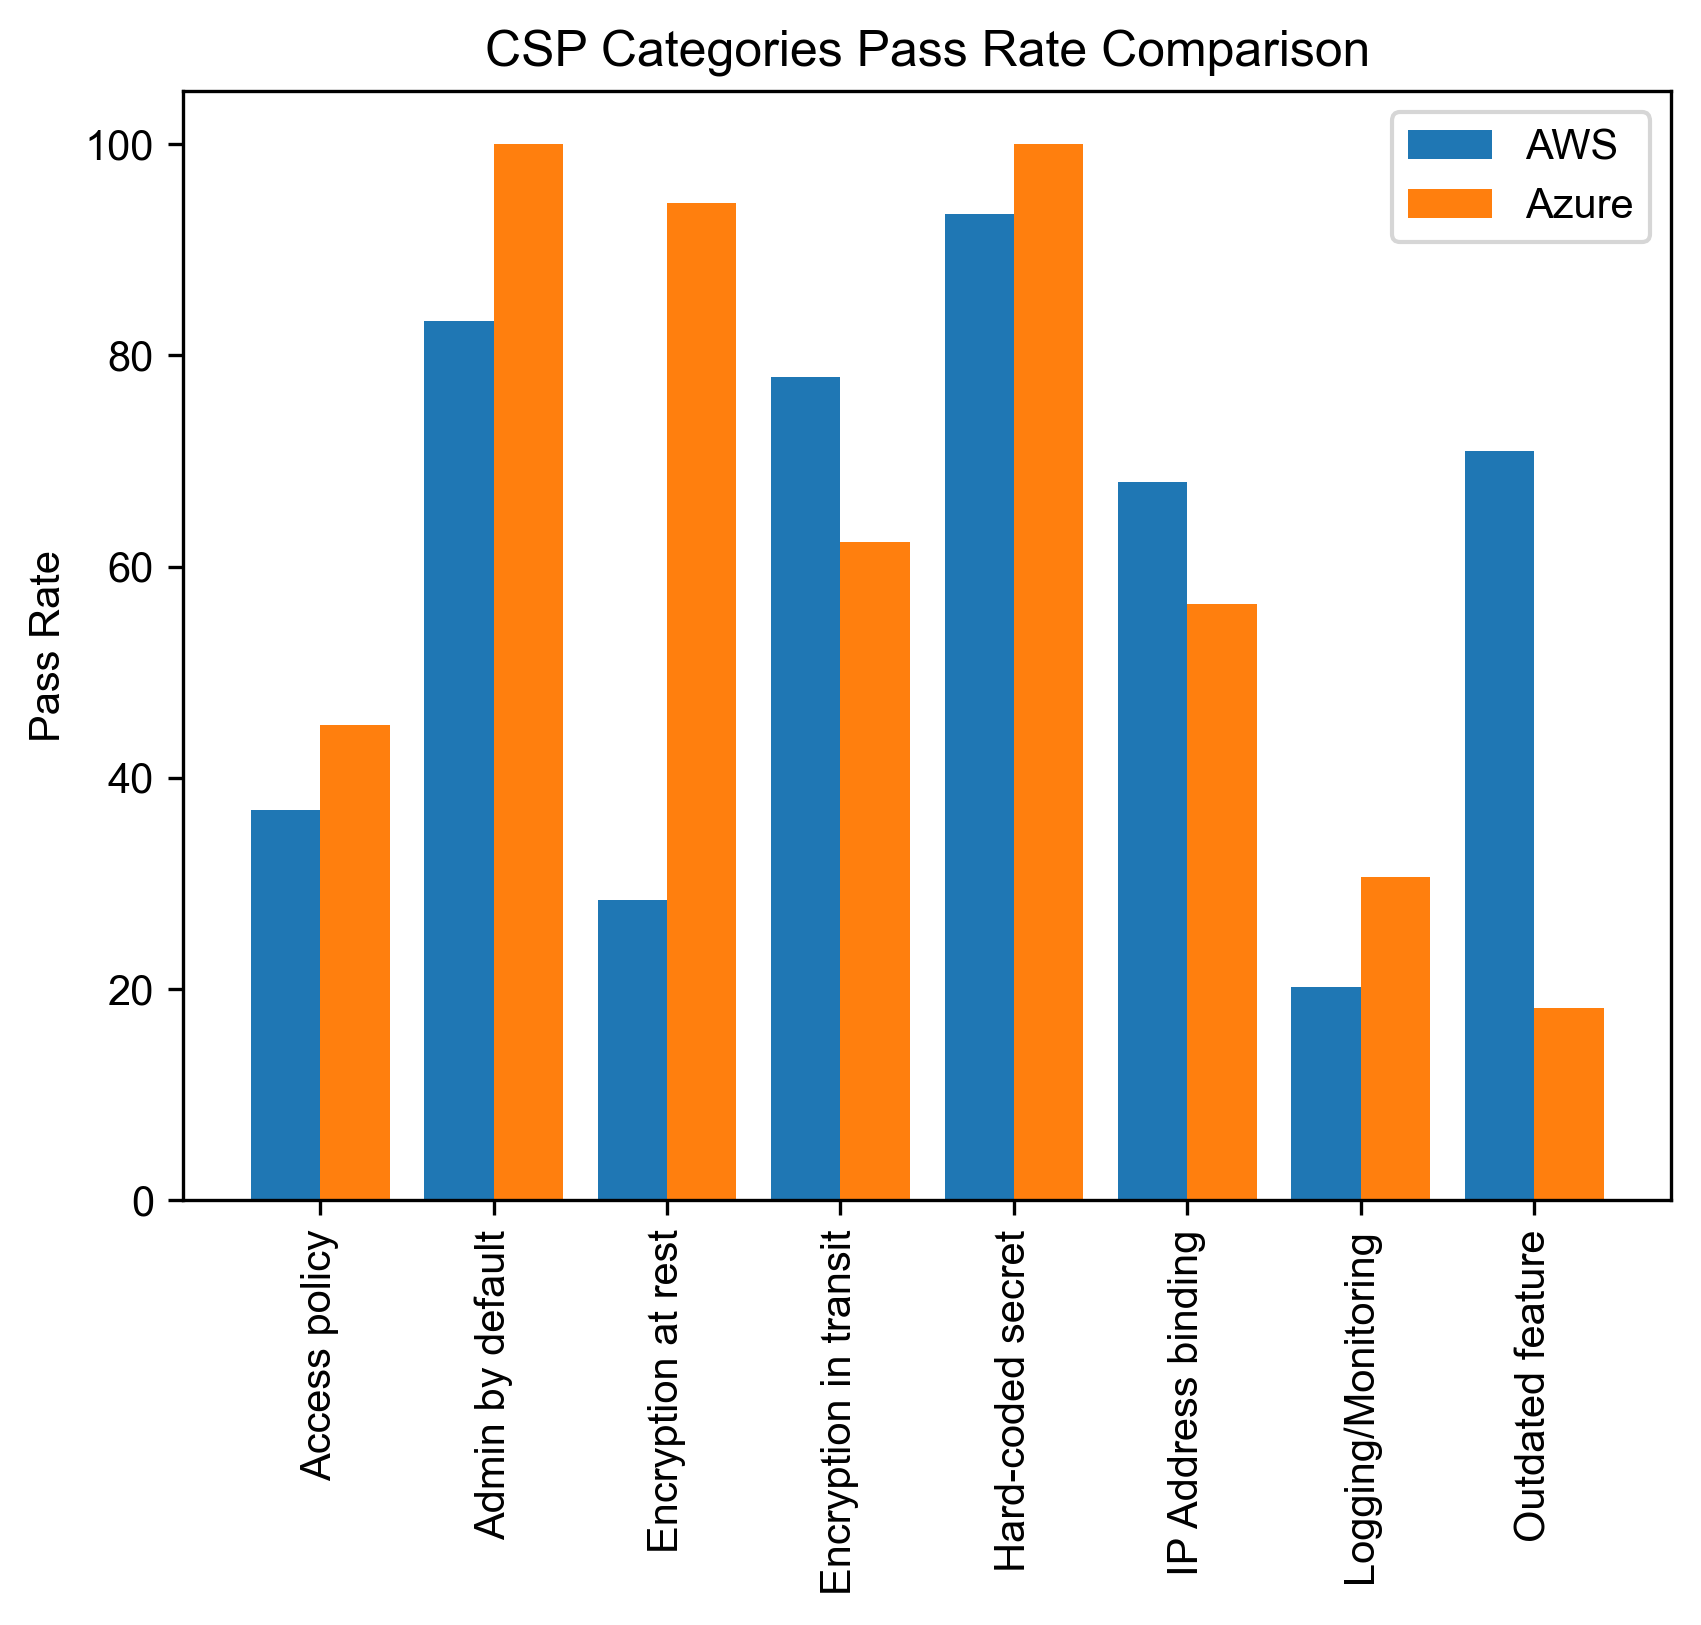

In [18]:
fig, ax = plt.subplots()

x_ticks = sorted([*aws_categories_rates.keys()])
x = np.arange(len([*aws_categories_rates.keys()]))
width = 0.4
y_aws = [100*aws_categories_rates[k] for k in x_ticks]
y_azure = [100*azure_categories_rates[k] for k in x_ticks]

ax.bar(x - width/2, y_aws, width, label='AWS')
ax.bar(x + width/2, y_azure, width, label='Azure')

# Customise some display properties
ax.set_ylabel('Pass Rate')
ax.set_title('CSP Categories Pass Rate Comparison')
ax.set_xticks(x)    # This ensures we have one tick per year, otherwise we get fewer
ax.set_xticklabels(x_ticks, rotation='vertical')
ax.legend()

# Ask Matplotlib to show the plot
plt.show()

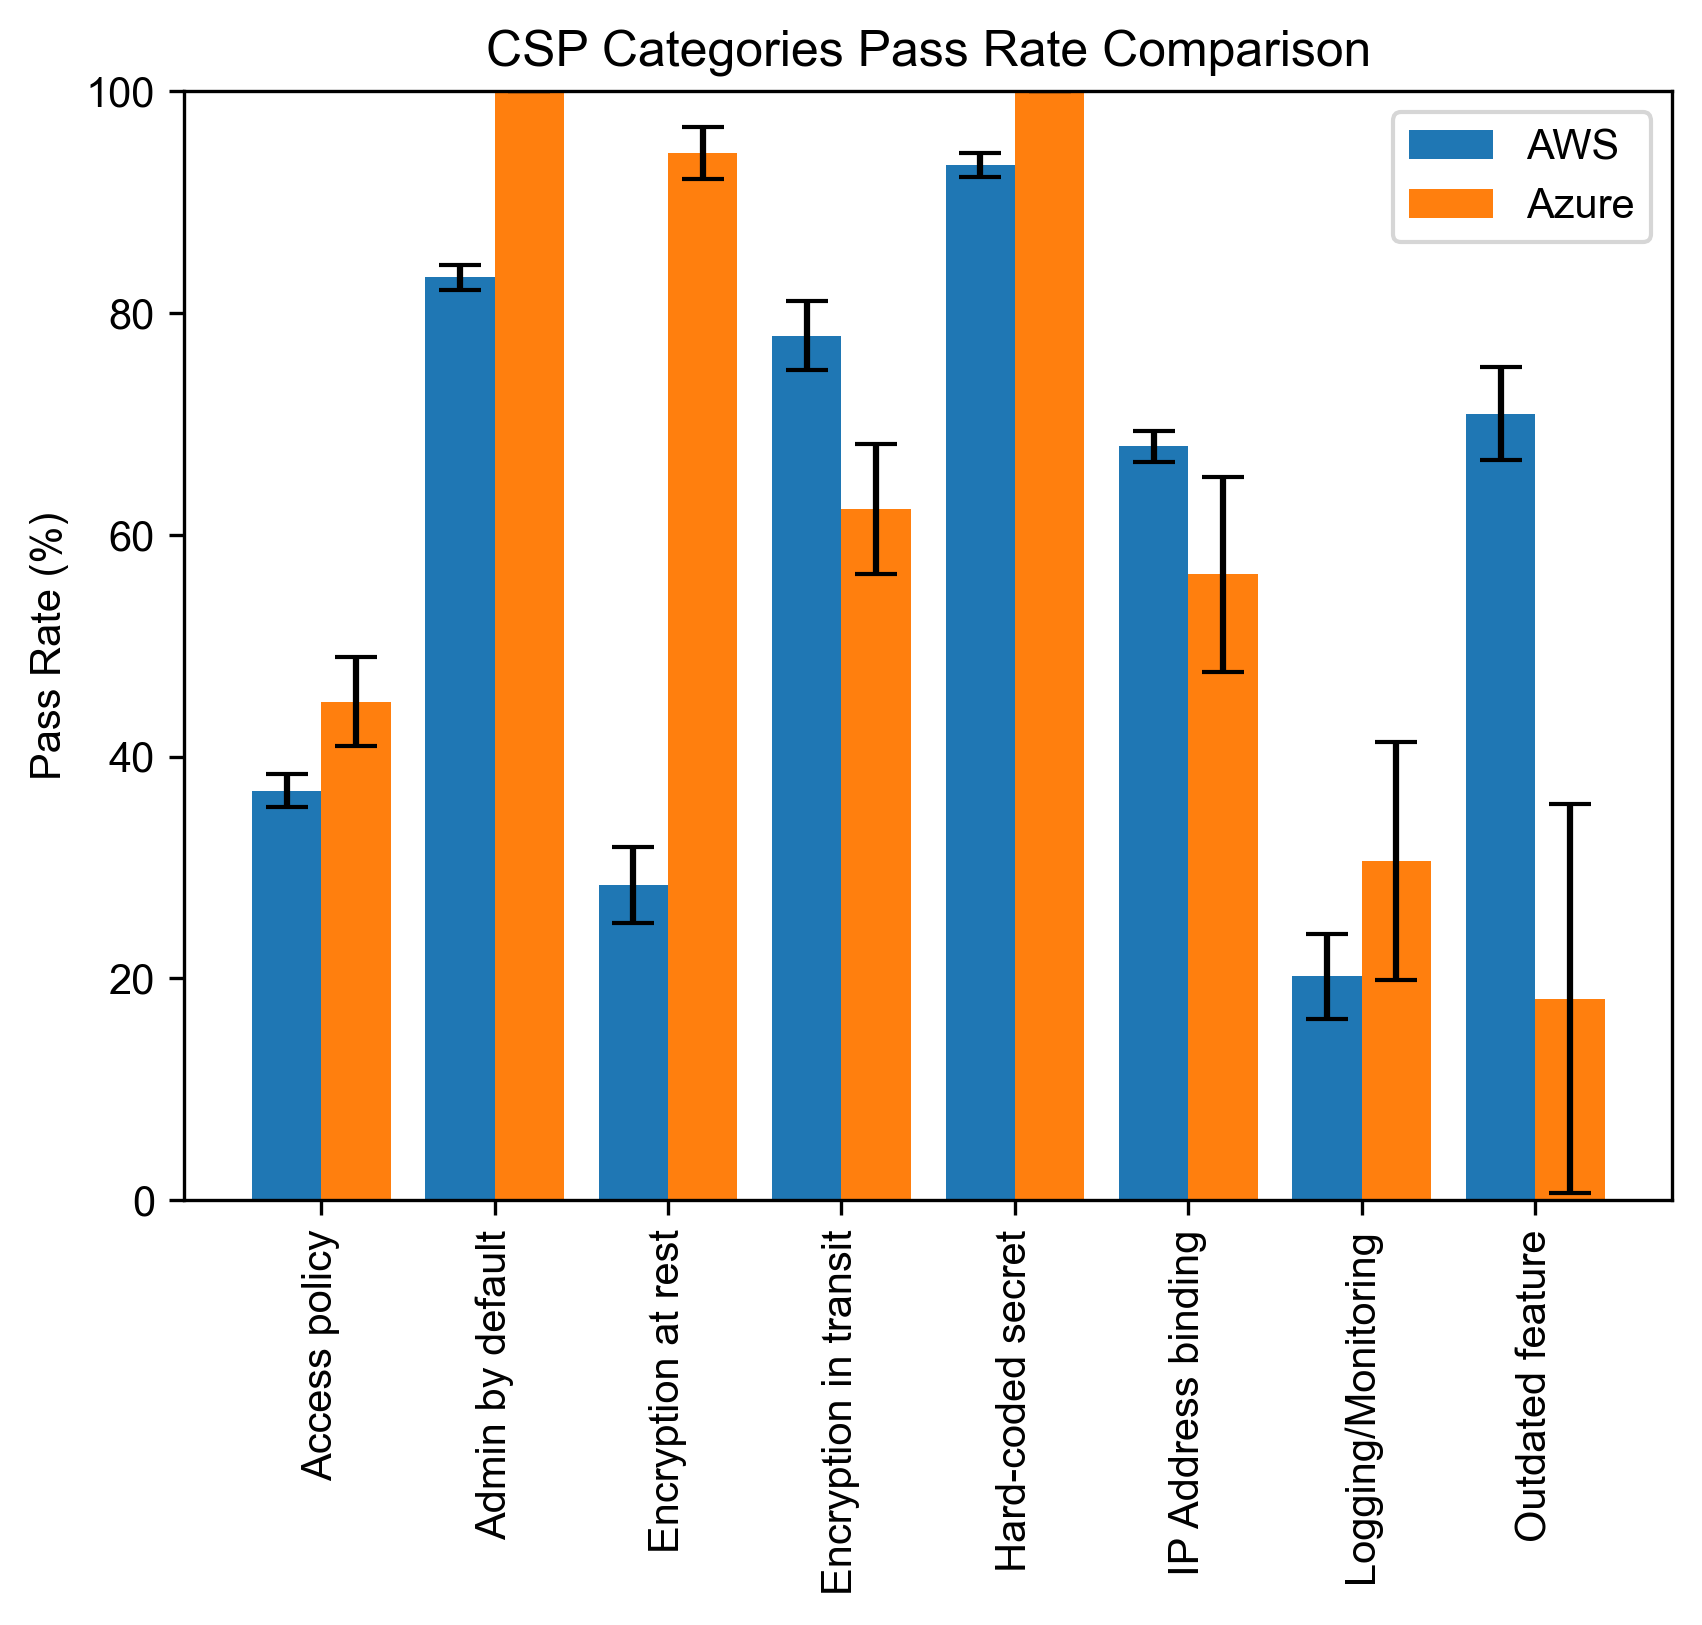

In [19]:
fig, ax = plt.subplots()
n_aws_cat = {"Admin by default": 9914, "Encryption in transit": 1716, "Encryption at rest": 4575, "Access policy": 20510,
              "Logging/Monitoring": 4107, "IP Address binding": 12766, "Hard-coded secret": 4143, "Outdated feature": 1254}
n_azure_cat = {"Admin by default": 96, "Encryption in transit": 824, "Encryption at rest": 768, "Access policy": 2568,
              "Logging/Monitoring": 452, "IP Address binding": 428, "Hard-coded secret": 47, "Outdated feature": 201}

z = 1.96 #z=1.96 for 95%, z=2.576 for 99%
x_ticks = sorted([*aws_categories_rates.keys()])
x = np.arange(len([*aws_categories_rates.keys()]))
width = 0.4
y_aws = [100*aws_categories_rates[k] for k in x_ticks]
y_azure = [100*azure_categories_rates[k] for k in x_ticks]

y_aws_err = [100*z*np.sqrt(z*((1-aws_categories_rates[k])/n_aws_cat[k])) for k in x_ticks]
y_azure_err = [100*z*np.sqrt(z*((1-azure_categories_rates[k])/n_azure_cat[k])) for k in x_ticks]

ax.bar(x - width/2, y_aws, width, label='AWS')
ax.bar(x + width/2, y_azure, width, label='Azure')
ax.errorbar(x - width/2, y_aws, yerr=y_aws_err, fmt='none', color='k', capsize=5)
ax.errorbar(x + width/2, y_azure, yerr=y_azure_err, fmt='none', color='k', capsize=5)

# Customise some display properties
ax.set_ylim([0, 100])
ax.set_ylabel('Pass Rate (%)')
ax.set_title('CSP Categories Pass Rate Comparison')
ax.set_xticks(x)    # This ensures we have one tick per year, otherwise we get fewer
ax.set_xticklabels(x_ticks, rotation='vertical')
ax.legend()

# Ask Matplotlib to show the plot
plt.show()

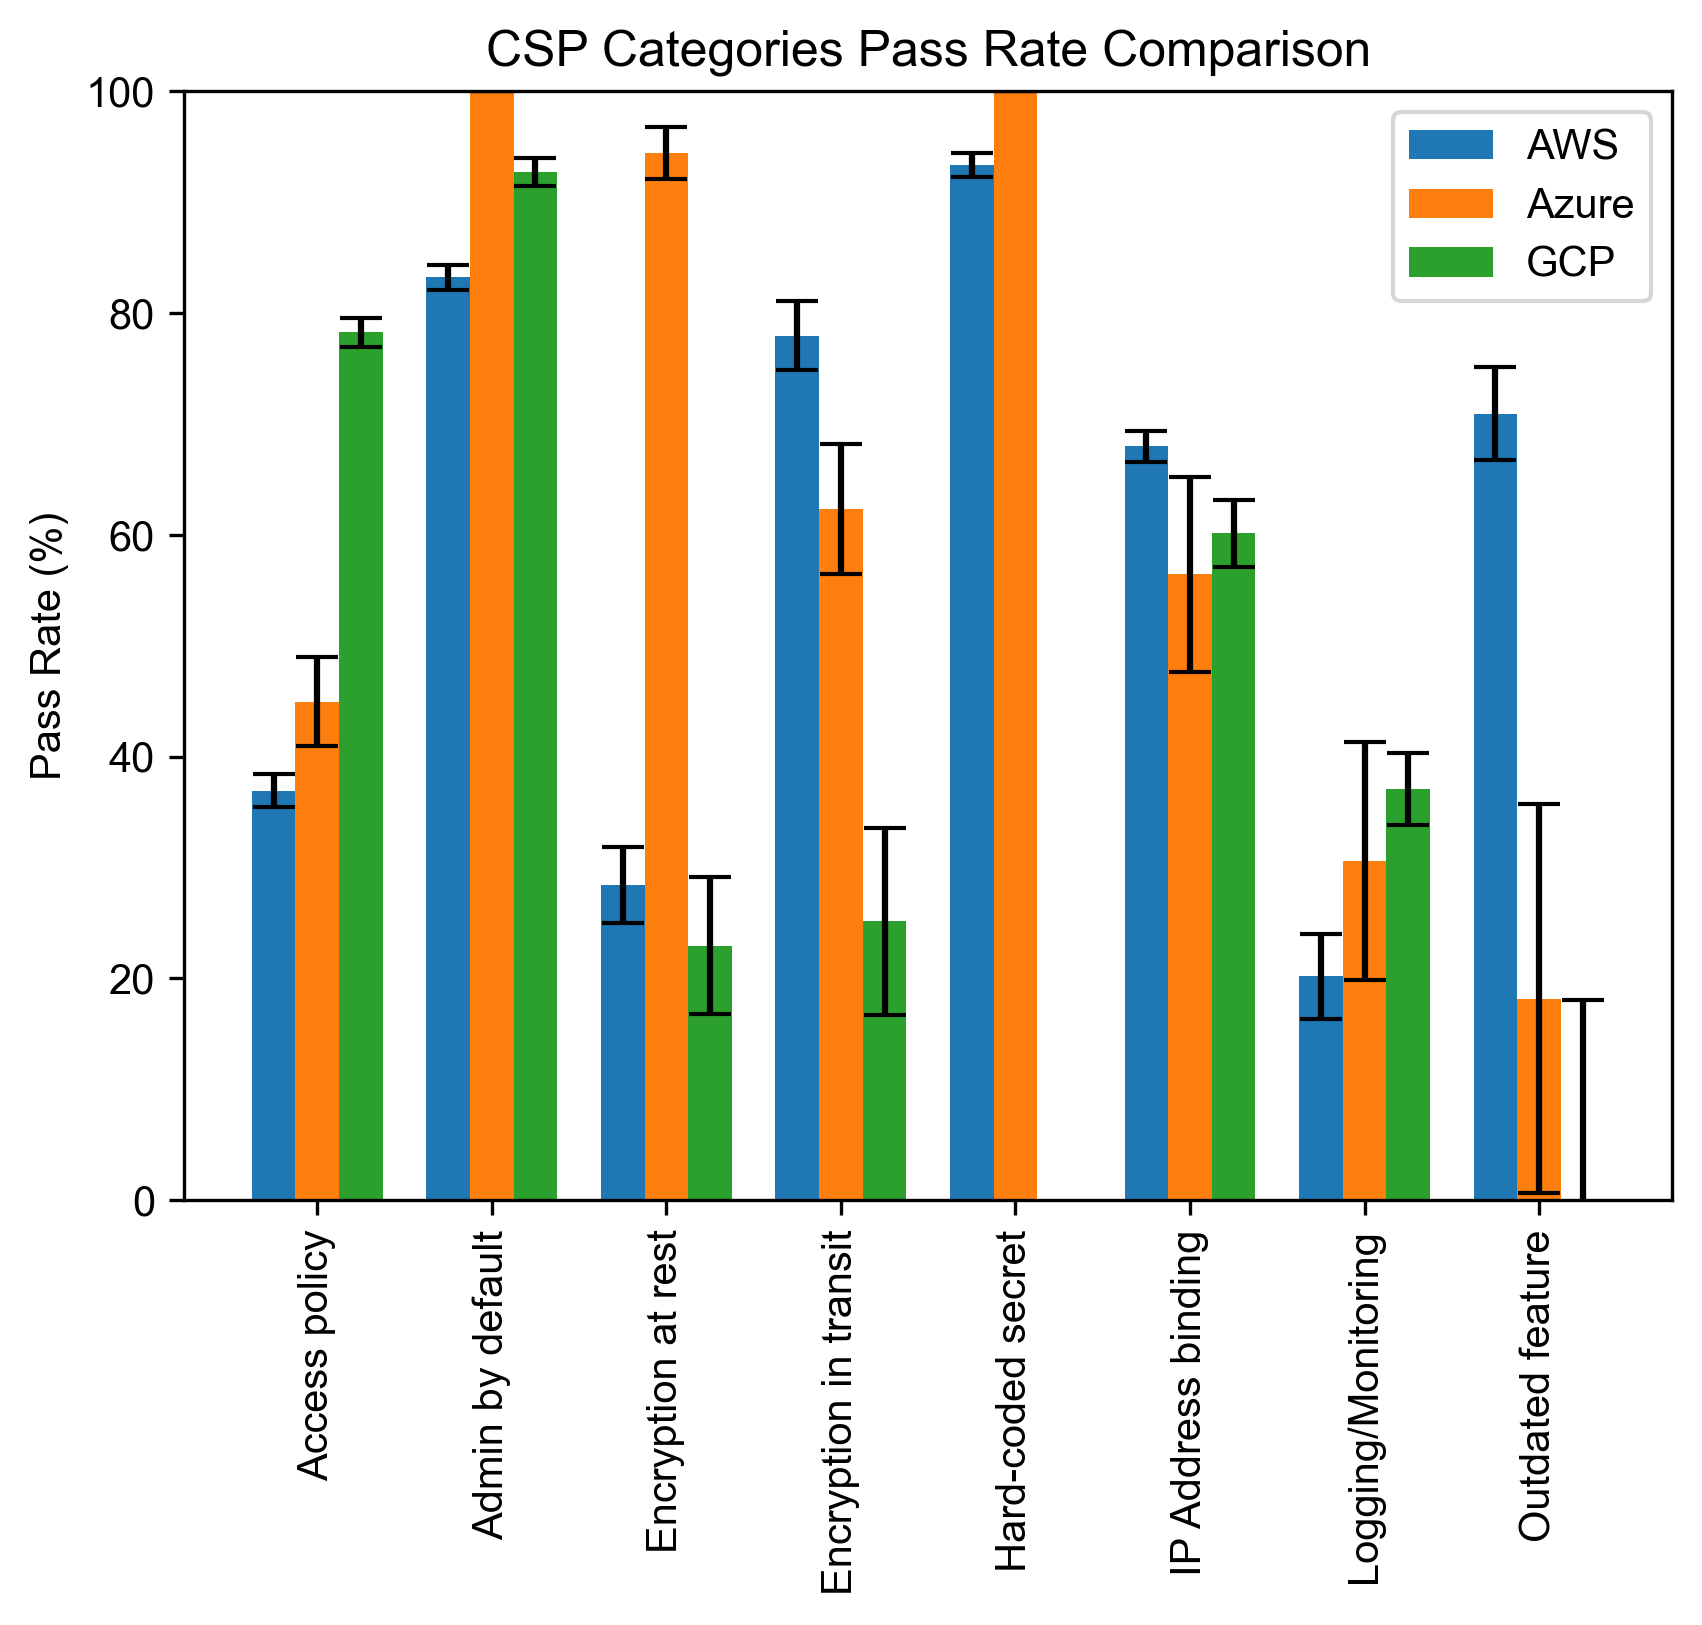

In [20]:
fig, ax = plt.subplots()
n_aws_cat = {"Admin by default": 9914, "Encryption in transit": 1716, "Encryption at rest": 4575, "Access policy": 20510,
              "Logging/Monitoring": 4107, "IP Address binding": 12766, "Hard-coded secret": 4143, "Outdated feature": 1254}
n_azure_cat = {"Admin by default": 96, "Encryption in transit": 824, "Encryption at rest": 768, "Access policy": 2568,
              "Logging/Monitoring": 452, "IP Address binding": 428, "Hard-coded secret": 47, "Outdated feature": 201}
n_google_cat = {"Admin by default": 3275, "Encryption in transit": 792, "Encryption at rest": 1522, "Access policy": 9594,
              "Logging/Monitoring": 4457, "IP Address binding": 3256, "Hard-coded secret": -1, "Outdated feature": 231}

z = 1.96 #z=1.96 for 95%, z=2.576 for 99%
x_ticks = sorted([*aws_categories_rates.keys()])
x = np.arange(len([*aws_categories_rates.keys()]))
width = 0.25
y_aws = [100*aws_categories_rates[k] for k in x_ticks]
y_azure = [100*azure_categories_rates[k] for k in x_ticks]
y_google = [100*google_categories_rates[k] for k in x_ticks]

y_aws_err = [100*z*np.sqrt(z*((1-aws_categories_rates[k])/n_aws_cat[k])) for k in x_ticks]
y_azure_err = [100*z*np.sqrt(z*((1-azure_categories_rates[k])/n_azure_cat[k])) for k in x_ticks]
#y_google_err = [100*z*np.sqrt(z*((1-google_categories_rates[k])/n_google_cat[k])) for k in x_ticks]
y_google_err = []
for k in x_ticks:
    if n_google_cat[k] == -1:
        y_google_err.append(np.nan)
    else:
        y_google_err.append(100*z*np.sqrt(z*((1-google_categories_rates[k])/n_google_cat[k])))
                            
ax.bar(x - width, y_aws, width, label='AWS')
ax.bar(x , y_azure, width, label='Azure')
ax.bar(x + width, y_google, width, label='GCP')
ax.errorbar(x - width, y_aws, yerr=y_aws_err, fmt='none', color='k', capsize=5)
ax.errorbar(x , y_azure, yerr=y_azure_err, fmt='none', color='k', capsize=5)
ax.errorbar(x + width, y_google, yerr=y_google_err, fmt='none', color='k', capsize=5)

# Customise some display properties
ax.set_ylim([0, 100])
ax.set_ylabel('Pass Rate (%)')
ax.set_title('CSP Categories Pass Rate Comparison')
ax.set_xticks(x)    # This ensures we have one tick per year, otherwise we get fewer
ax.set_xticklabels(x_ticks, rotation='vertical')
ax.legend()

# Ask Matplotlib to show the plot
plt.show()